# 1. Installing Dependencies

In [216]:
pip install tensorflow opencv-python numpy matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [217]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [218]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt

In [219]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/home/vipul/anaconda3/lib/python3.11/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [220]:
# pip list

In [221]:
#Avoid Out of Memory errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU') # Listing GPUs
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [222]:
import cv2
import imghdr

In [223]:
data_dir = 'data'

In [224]:
os.listdir(data_dir)

['happy', 'sad', '.ipynb_checkpoints']

In [225]:
image_exts = ['jpeg','jpg','bmp','png']

Traversing each image in data directory and removing images where extension dont match

In [226]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 2. Load the Data

In [227]:
import numpy as np

In [228]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [229]:
data_iterator = data.as_numpy_iterator()

In [230]:
# Get a batch from the Iterator
batch = data_iterator.next()

In [231]:
#Images represnted as Np array
batch[0].shape

(32, 256, 256, 3)

In [232]:
#Class 1 : Sad people
#Class 0 : Happy people
batch[1]

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

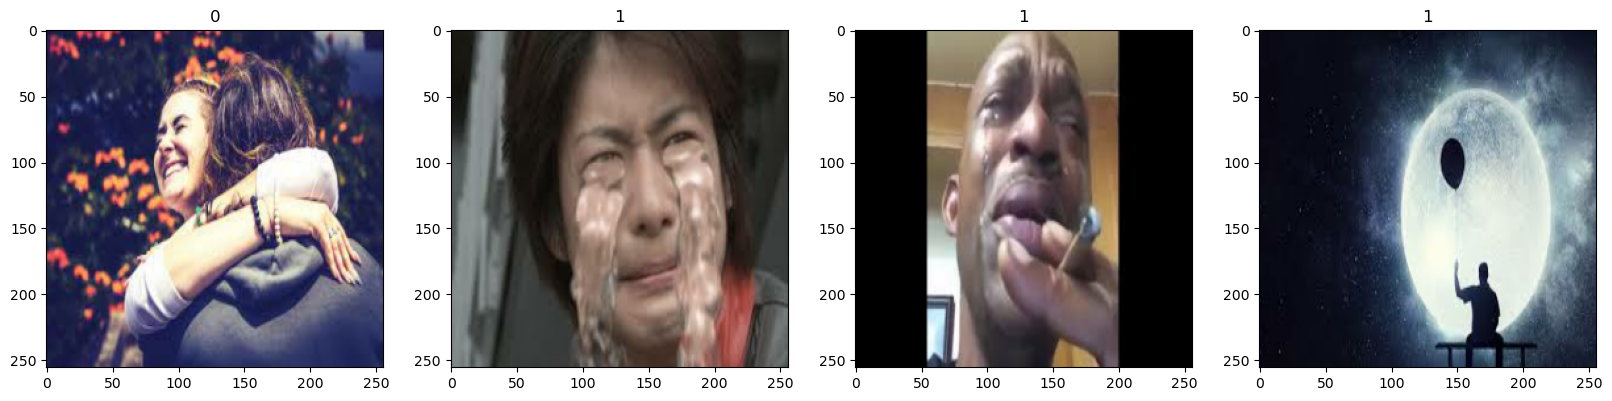

In [233]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [234]:
# scaled= batch[0]/255

In [235]:
# scaled.max()

In [236]:
# Scaling the Data into 0 or 1
data = data.map(lambda x, y: (x/255, y))

In [237]:
data.as_numpy_iterator().next()

(array([[[[0.99725556, 0.7375577 , 0.78270227],
          [0.9885786 , 0.6611808 , 0.6953666 ],
          [0.9859375 , 0.5843507 , 0.55476147],
          ...,
          [0.9020995 , 0.6478742 , 0.38825408],
          [0.8772347 , 0.6146482 , 0.37928563],
          [0.8845294 , 0.6389565 , 0.39019248]],
 
         [[0.99043304, 0.7578935 , 0.8037215 ],
          [0.98664755, 0.68013173, 0.71388775],
          [0.9720087 , 0.5791165 , 0.6084887 ],
          ...,
          [0.954893  , 0.7050324 , 0.47559744],
          [0.90777564, 0.65329266, 0.43952745],
          [0.86856246, 0.6489574 , 0.41157347]],
 
         [[0.9974814 , 0.7340922 , 0.8060438 ],
          [0.99774814, 0.69494593, 0.7313456 ],
          [0.98193645, 0.54278564, 0.6181992 ],
          ...,
          [0.9107149 , 0.6602105 , 0.41071346],
          [0.8956326 , 0.64673555, 0.4004099 ],
          [0.852825  , 0.64388186, 0.3972254 ]],
 
         ...,
 
         [[0.64954007, 0.70489335, 0.84931487],
          [0.74529

In [238]:
batch[0].min()

0.0

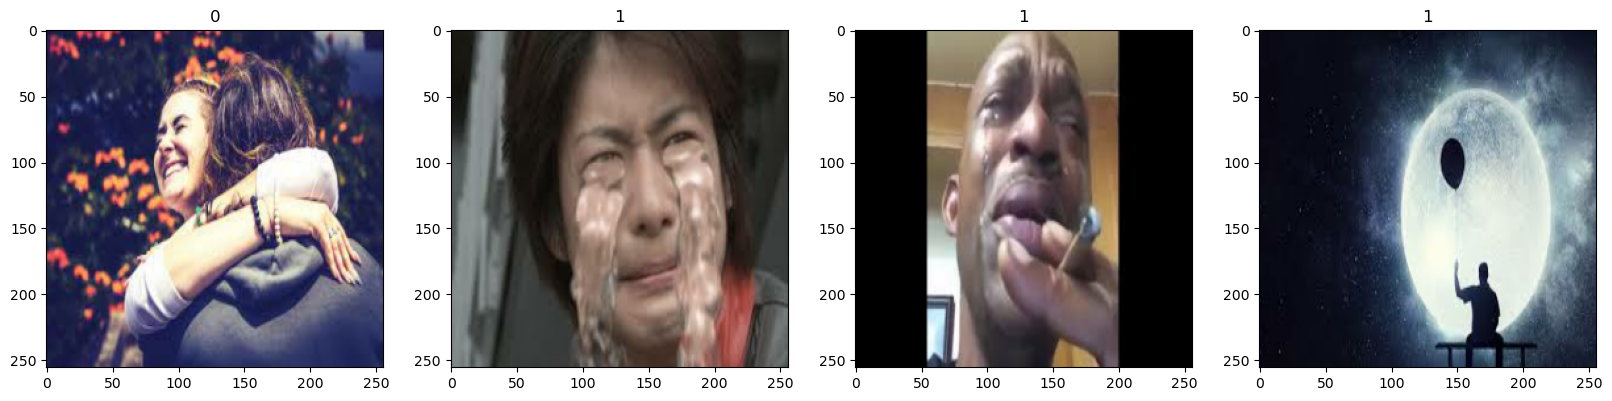

In [239]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Split the Data


In [240]:
# No. of Batches
len(data)

10

In [241]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [242]:
# Print the Train, Validate and Test Dataset
print(train_size)
print(val_size)
print(test_size)
# Train + Validate + Test = No. of batches 
# Split your Data Accordingly above

7
2
1


In [243]:
# Data Distribution: 

# Shuffle the Data before adding it here
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.take(train_size+val_size).take(test_size)

In [244]:
len(test)

1

# 5. Build model

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [246]:
model = Sequential()

In [247]:
# Conv2D??
# MaxPooling2D??

In [248]:
#model.add(Conv2D(#filters,#filter-size, stride, activation='relu'))
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dropout(0.5))

In [249]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [250]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

# 6. Train Model

In [251]:
logdir = "logs"

In [252]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [253]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
7/7 [==============================] - 3s 268ms/step - loss: 0.8265 - accuracy: 0.5179 - val_loss: 0.6661 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 2s 265ms/step - loss: 0.6517 - accuracy: 0.5134 - val_loss: 0.5680 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 3s 321ms/step - loss: 0.6067 - accuracy: 0.7277 - val_loss: 0.5264 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 2s 253ms/step - loss: 0.4913 - accuracy: 0.8036 - val_loss: 0.6063 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 3s 279ms/step - loss: 0.5288 - accuracy: 0.7321 - val_loss: 0.4430 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 2s 251ms/step - loss: 0.4468 - accuracy: 0.8080 - val_loss: 0.3674 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 2s 259ms/step - loss: 0.3986 - accuracy: 0.8438 - val_loss: 0.3289 - val_accuracy: 0.8906
Epoch 8/20
7/7 [====

In [254]:
# hist.history

# 7. Plot Performance

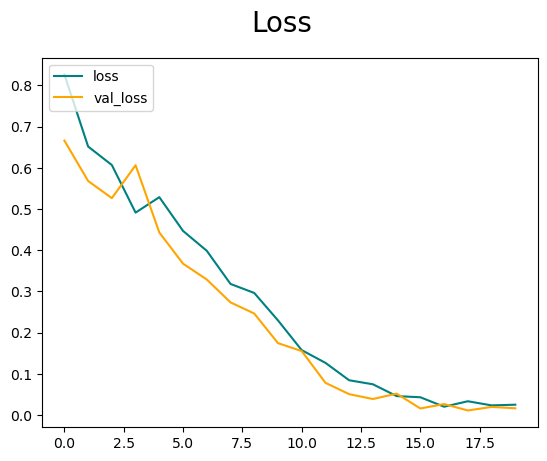

In [255]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

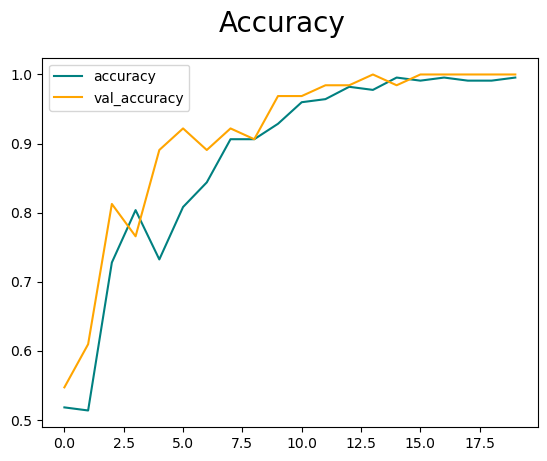

In [256]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate Performance

In [257]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [258]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [259]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 69ms/step


In [260]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 9. Testing the Model

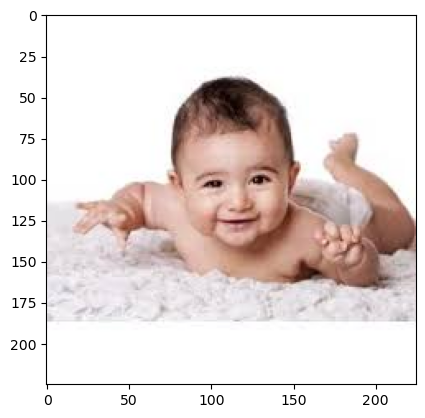

In [283]:
img = cv2.imread('happy11.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

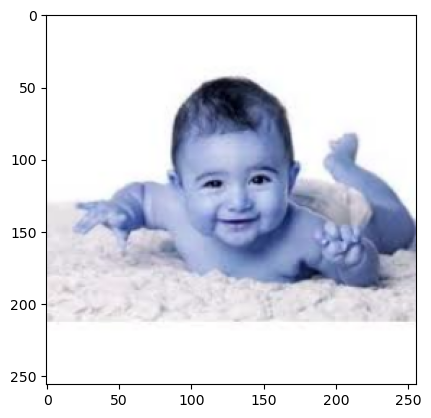

In [284]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [285]:
resize.shape

TensorShape([256, 256, 3])

In [286]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [287]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

1/1 [==============================] - 0s 12ms/step


In [288]:
yhat

array([[0.42580086]], dtype=float32)

In [289]:
if yhat > 0.5 :
    print(f'Sad Image')
elif yhat < 0.5 :
    print(f'Happy Image')

Happy Image


# 10. Saving the Model

In [290]:
from tensorflow.keras.models import load_model

In [297]:
model.save(os.path.join('models','imageclassifier.keras'))

In [299]:
new_model = load_model('models/imageclassifier.keras')

In [300]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


array([[0.42580086]], dtype=float32)